 ##     Overview
 
#### A comprehensive analysis of data analyst job postings, revealing key trends in salary, required skills, and skill demand.  The analysis reveals a right-skewed salary distribution, indicating a few high-paying roles significantly influence the average.  Consistently, SQL, Python, Excel, and Tableau emerge as the most crucial skills, appearing across multiple analyses regardless of salary level or work-from-home preference.  The analysis also highlights the top 10 highest-paying data analyst jobs, revealing substantial salary variation even among high-paying positions, suggesting factors beyond core skills influence compensation.

#### The study leverages multiple datasets to provide a multifaceted view of the data analyst job market.  By combining salary data with skill frequency and demand counts, the notebook offers valuable insights for professionals seeking to enhance their skill sets or employers aiming to understand current market demands.  The findings confirm the importance of core data skills but also highlight the need to consider additional factors, such as location and experience, to fully understand the complexity of the job market and salary expectations.

#### Further investigation could focus on correlating specific skill combinations with salary levels, exploring how skill demand changes over time, and examining the influence of location and experience on compensation.  The robustness of these findings depends heavily on the quality and representativeness of the underlying datasets; using larger, more diverse data sources would likely yield more reliable results and a more complete understanding of the data analyst landscape.

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
data = pd.read_csv('top_paing_jobs.csv')
data.head(5)

,job_id,company_name,job_title,job_posted_date,salary_year_avg,skills
0,552322,AT&T,Associate Director- Data Insights,2023-06-18 16:03:12,255829.5,sql
1,552322,AT&T,Associate Director- Data Insights,2023-06-18 16:03:12,255829.5,python
2,552322,AT&T,Associate Director- Data Insights,2023-06-18 16:03:12,255829.5,r
3,552322,AT&T,Associate Director- Data Insights,2023-06-18 16:03:12,255829.5,azure
4,552322,AT&T,Associate Director- Data Insights,2023-06-18 16:03:12,255829.5,databricks


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66 entries, 0 to 65
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   job_id           66 non-null     int64  
 1   company_name     66 non-null     object 
 2   job_title        66 non-null     object 
 3   job_posted_date  66 non-null     object 
 4   salary_year_avg  66 non-null     float64
 5   skills           66 non-null     object 
dtypes: float64(1), int64(1), object(4)
memory usage: 3.2+ KB


## Distribution of Salary

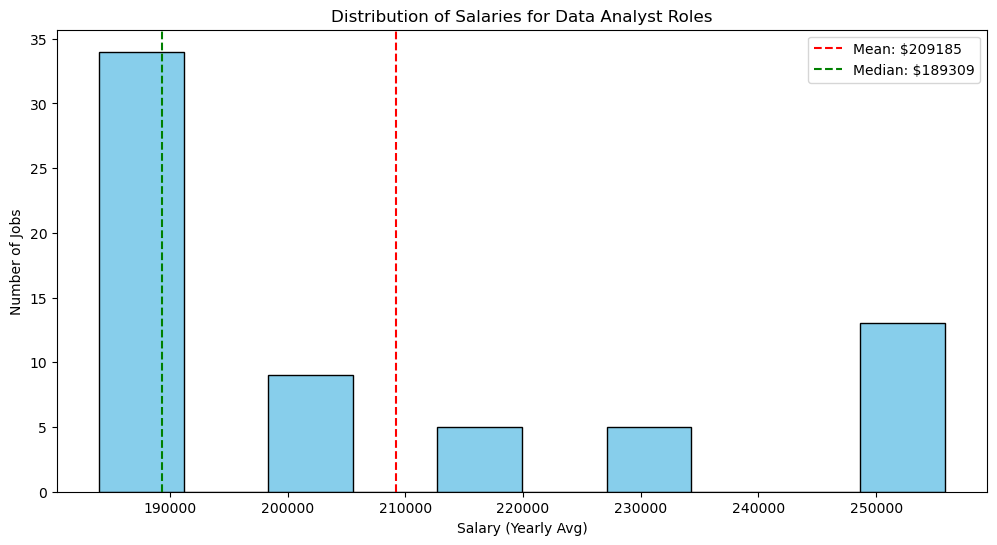

In [24]:
# Calculate salary statistics
salary_stats = {
    'mean_salary': data['salary_year_avg'].mean(),
    'median_salary': data['salary_year_avg'].median(),
    'min_salary': data['salary_year_avg'].min(),
    'max_salary': data['salary_year_avg'].max()
}


# Setting up the figures
#fig, axes = plt.subplots(2, 1, figsize=(12, 12))
#fig.tight_layout(pad=6.0)
fig, ax = plt.subplots(figsize=(12, 6))  # Use ax instead of axes to create a single subplot

# Salary distribution plot
ax.hist(data['salary_year_avg'], bins=10, color='skyblue', edgecolor='black')
ax.set_title('Distribution of Salaries for Data Analyst Roles')
ax.set_xlabel('Salary (Yearly Avg)')
ax.set_ylabel('Number of Jobs')
ax.axvline(salary_stats['mean_salary'], color='red', linestyle='--', label=f"Mean: ${salary_stats['mean_salary']:.0f}")
ax.axvline(salary_stats['median_salary'], color='green', linestyle='--', label=f"Median: ${salary_stats['median_salary']:.0f}")
ax.legend()



# Show plots
plt.show()

## Top Skills Frequency

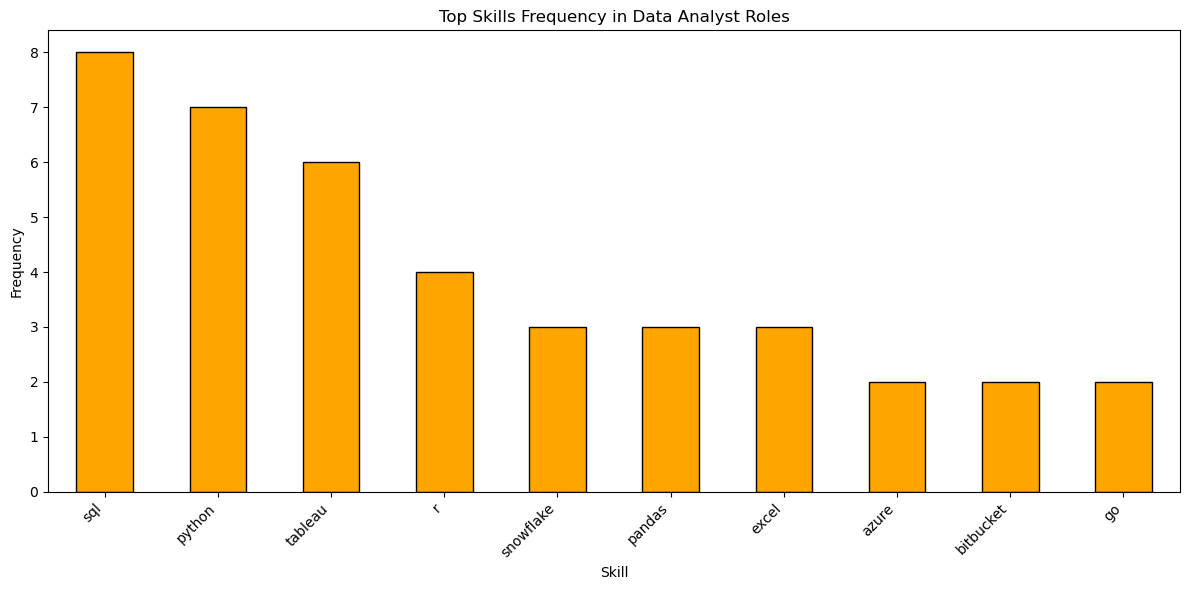

In [22]:


# Setting up the figure
fig, ax = plt.subplots(figsize=(12, 6))  # Use ax instead of axes to create a single subplot

# Calculate the frequency of each skill
skills_frequency = data['skills'].value_counts().head(10)

# Top skills frequency plot
skills_frequency.plot(kind='bar', color='orange', edgecolor='black', ax=ax)  # Pass ax to the plot function
ax.set_title('Top Skills Frequency in Data Analyst Roles')
ax.set_xlabel('Skill')
ax.set_ylabel('Frequency')
ax.set_xticklabels(skills_frequency.index, rotation=45, ha='right')

# Show plots
plt.tight_layout()  # Adjust layout for better spacing
plt.show()


In [17]:
data2 = pd.read_csv('high_demand_skills.csv')
data2.head()

,skills,demand_count
0,sql,92628
1,excel,67031
2,python,57326
3,tableau,46554
4,power bi,39468


## Demand Count Skills

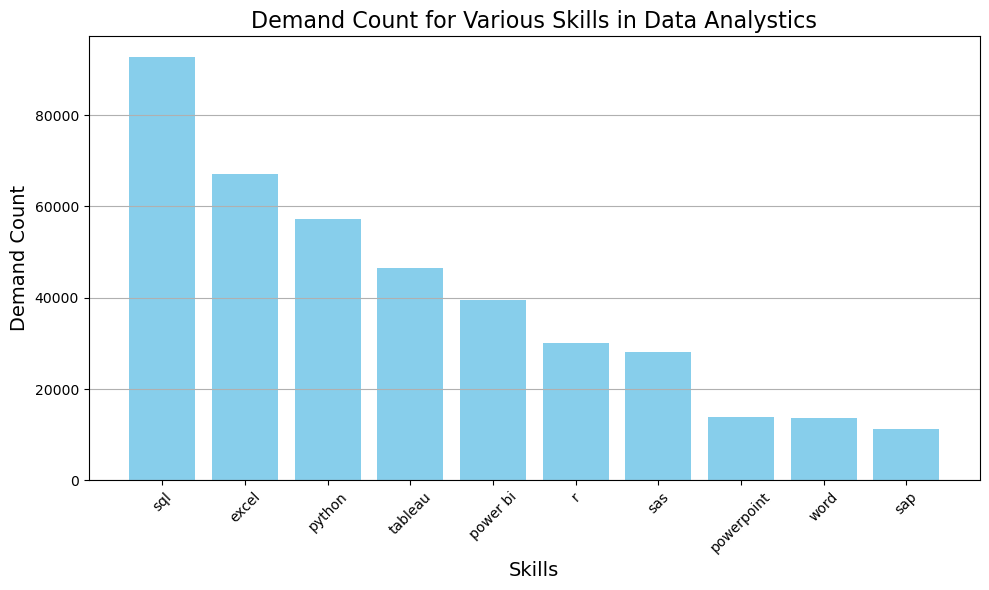

In [20]:
# Create the bar chart
plt.figure(figsize=(10, 6))
plt.bar(data2['skills'], data2['demand_count'], color='skyblue')
plt.title('Demand Count for Various Skills in Data Analystics', fontsize=16)
plt.xlabel('Skills', fontsize=14)
plt.ylabel('Demand Count', fontsize=14)
plt.xticks(rotation=45)
plt.grid(axis='y')

# Display the chart
plt.tight_layout()
plt.show()

## Check the shape and columns of the DataFrames

In [12]:

print("Job Postings Fact Shape:", job_postings_fact.shape)
print("Company Dim Shape:", company_dim.shape)
print("Skills Job Dim Shape:", skills_job_dim.shape)
print("Skills Dim Shape:", skills_dim.shape)

Job Postings Fact Shape: (787686, 16)
Company Dim Shape: (140033, 5)
Skills Job Dim Shape: (3669604, 2)
Skills Dim Shape: (259, 3)


## Top 10 paying Data Analyst job

         job_id                                     name  \
320027   226942                                   Mantys   
633019   547382                                     Meta   
157455   552322                                     AT&T   
183977    99305             Pinterest Job Advertisements   
381295  1021647                        Uclahealthcareers   
212825   168310                               SmartAsset   
333253   731368                              Inclusively   
364113   310660                                 Motional   
180147  1749593                               SmartAsset   
670926   387860  Get It Recruit - Information Technology   

                                              job_title      job_posted_date  \
320027                                     Data Analyst  2023-02-20 15:13:33   
633019                            Director of Analytics  2023-08-23 12:04:42   
157455                Associate Director- Data Insights  2023-06-18 16:03:12   
183977             

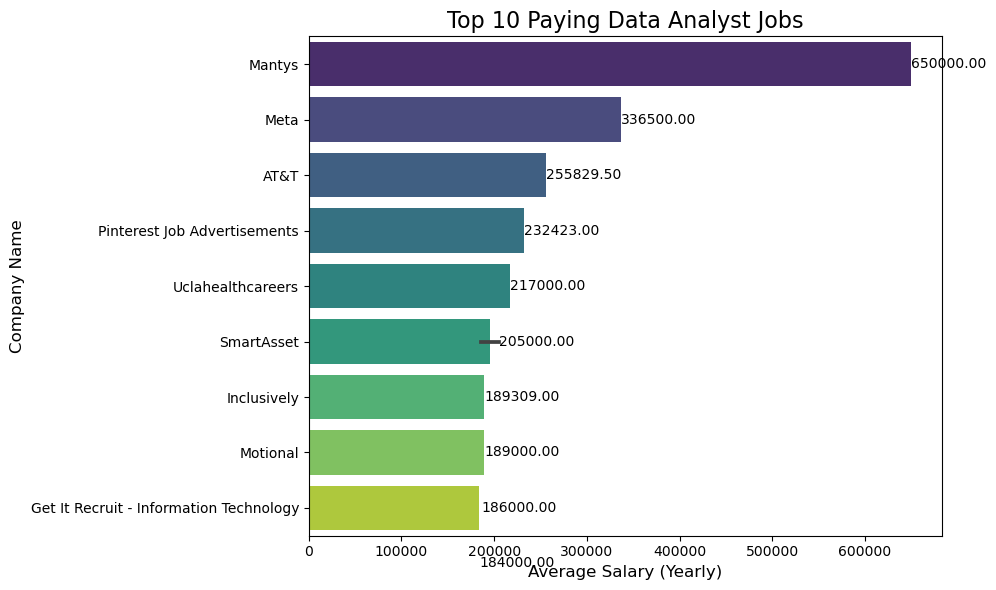

In [14]:


# Load your data into DataFrames
job_postings_fact = pd.read_csv('job_postings_fact.csv')  # Replace with your actual data source
company_dim = pd.read_csv('company_dim.csv')              # Replace with your actual data source

# Merge the dataframes
top_paying_jobs = (
    job_postings_fact
    .merge(company_dim, left_on='company_id', right_on='company_id', how='left')
    .loc[
        (job_postings_fact['job_title_short'] == 'Data Analyst') &
        (job_postings_fact['job_location'] == 'Anywhere') &
        (job_postings_fact['salary_year_avg'].notna()),
        ['job_id', 'name', 'job_title', 'job_posted_date', 'salary_year_avg']
    ]
    .nlargest(10, 'salary_year_avg')  # Get top 10 jobs by salary
)

print(top_paying_jobs)

# Plotting the top-paying jobs
plt.figure(figsize=(10, 6))
sns.barplot(data=top_paying_jobs, x='salary_year_avg', y='name', palette='viridis')

# Adding titles and labels
plt.title('Top 10 Paying Data Analyst Jobs', fontsize=16)
plt.xlabel('Average Salary (Yearly)', fontsize=12)
plt.ylabel('Company Name', fontsize=12)

# Show value annotations on bars
for index, value in enumerate(top_paying_jobs['salary_year_avg']):
    plt.text(value, index, f'{value:.2f}', va='center')

plt.tight_layout()  # Automatically adjusts subplot params for better layout
plt.show()


## Skills Required for Top-Paying Roles

/var/folders/db/jvp5cdcs4w74f6zvpcfm0rn40000gn/T/ipykernel_72583/1830860822.py:50: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()  # Automatically adjusts subplot params for better layout


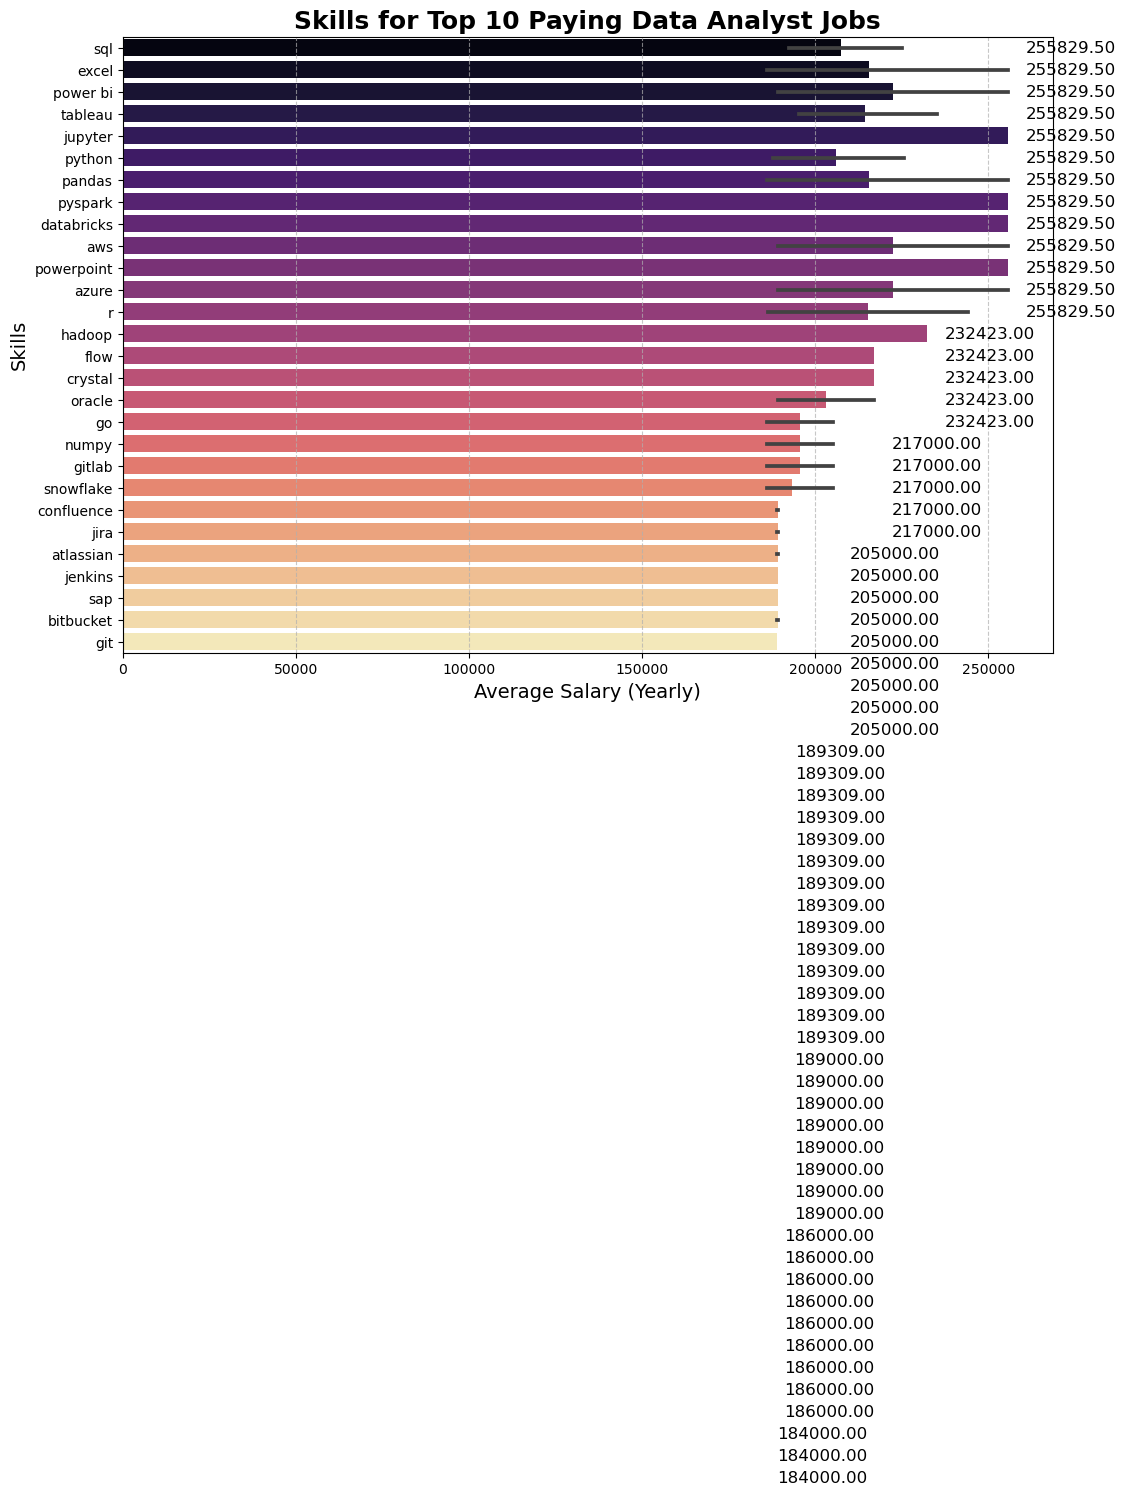

In [19]:

# Load your job postings and skills data
job_postings_fact = pd.read_csv('job_postings_fact.csv')  # Replace with your actual data source
company_dim = pd.read_csv('company_dim.csv')              # Replace with your actual data source
skills_job_dim = pd.read_csv('skills_job_dim.csv')        # Replace with your actual data source
skills_dim = pd.read_csv('skills_dim.csv')                # Replace with your actual data source

# Merge DataFrames to get skills for top-paying jobs
top_paying_jobs_skills = (
    job_postings_fact
    .merge(company_dim, left_on='company_id', right_on='company_id', how='left')
    .loc[
        (job_postings_fact['job_title_short'] == 'Data Analyst') &
        (job_postings_fact['job_location'] == 'Anywhere') &
        (job_postings_fact['salary_year_avg'].notna()),
        ['job_id', 'name', 'job_title', 'job_posted_date', 'salary_year_avg']
    ]
    .nlargest(10, 'salary_year_avg')
)

# Now join with skills
result_with_skills = (
    top_paying_jobs_skills
    .merge(skills_job_dim, on='job_id', how='inner')
    .merge(skills_dim, on='skill_id', how='inner')
)

# Sort by salary
result_with_skills_sorted = result_with_skills.sort_values(by='salary_year_avg', ascending=False)

# Plotting the skills and salaries for top-paying jobs
plt.figure(figsize=(12, 8))
sns.barplot(data=result_with_skills_sorted, x='salary_year_avg', y='skills', palette='magma')

# Adding titles and labels with increased font sizes
plt.title('Skills for Top 10 Paying Data Analyst Jobs', fontsize=18, fontweight='bold')
plt.xlabel('Average Salary (Yearly)', fontsize=14)
plt.ylabel('Skills', fontsize=14)

# Adding grid lines for better readability
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Show value annotations on bars
for index, value in enumerate(result_with_skills_sorted['salary_year_avg']):
    plt.text(value + 5000, index, f'{value:.2f}', va='center', fontsize=12)  # Adjust the offset if necessary

plt.tight_layout()  # Automatically adjusts subplot params for better layout
plt.show()


## Most In-Demand Skills

Merged DF shape after first merge: (3669604, 17)
Merged DF shape after second merge: (3669604, 19)
            demand_count
skills                  
sql                 7291
excel               4611
python              4330
tableau             3745
power bi            2609
r                   2142
sas                 1866
looker               868
azure                821
powerpoint           819


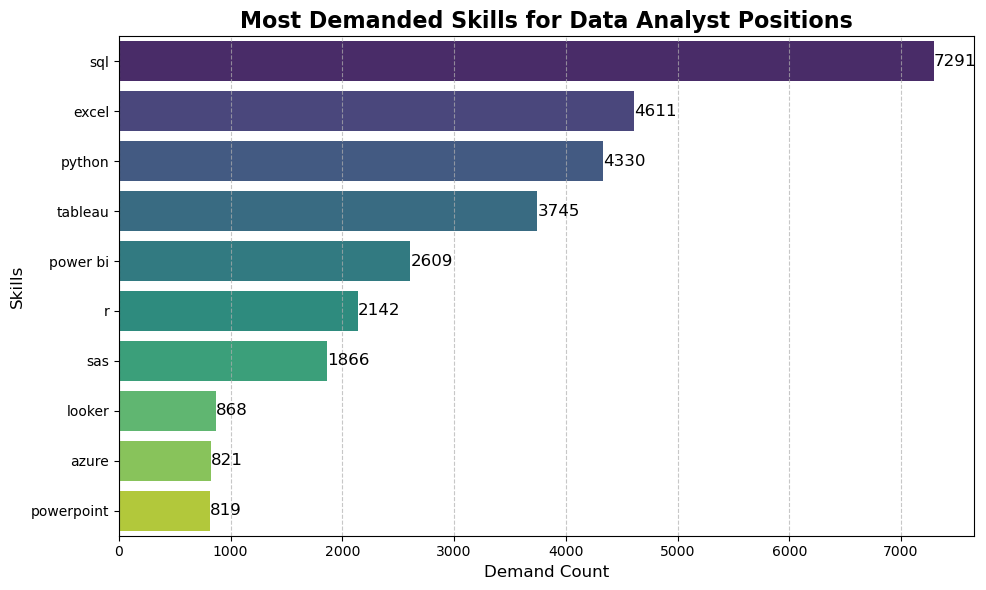

In [20]:


# Load your data into DataFrames
job_postings_fact = pd.read_csv('job_postings_fact.csv')  # Replace with your actual data source
skills_job_dim = pd.read_csv('skills_job_dim.csv')        # Replace with your actual data source
skills_dim = pd.read_csv('skills_dim.csv')                # Replace with your actual data source

# Step 1: Merge job postings with skills job dimension
try:
    merged_df = job_postings_fact.merge(skills_job_dim, on='job_id', how='inner')
    print("Merged DF shape after first merge:", merged_df.shape)
except KeyError as e:
    print(f"KeyError: {e}. Check if 'job_id' exists in both DataFrames.")

# Step 2: Now merge with skills dimension
try:
    merged_df = merged_df.merge(skills_dim, on='skill_id', how='inner')
    print("Merged DF shape after second merge:", merged_df.shape)
except KeyError as e:
    print(f"KeyError: {e}. Check if 'skill_id' exists in both DataFrames.")

# Step 3: Apply the filters using the merged DataFrame
most_demanded_skills = (
    merged_df
    .loc[
        (merged_df['job_title_short'] == 'Data Analyst') & 
        (merged_df['job_work_from_home'] == True),
        ['skills', 'job_id']  # Ensure these columns exist in merged_df
    ]
    .groupby('skills')
    .agg(demand_count=('job_id', 'count'))
    .nlargest(10, 'demand_count')
)

# Output the demand counts
print(most_demanded_skills)

# Plotting the most demanded skills
plt.figure(figsize=(10, 6))
sns.barplot(data=most_demanded_skills.reset_index(), x='demand_count', y='skills', palette='viridis')

# Adding titles and labels
plt.title('Most Demanded Skills for Data Analyst Positions', fontsize=16, fontweight='bold')
plt.xlabel('Demand Count', fontsize=12)
plt.ylabel('Skills', fontsize=12)

# Adding grid lines for better readability
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Show value annotations on bars
for index, value in enumerate(most_demanded_skills['demand_count']):
    plt.text(value + 0.5, index, f'{value}', va='center', fontsize=12)  # Adjust the offset for visibility

plt.tight_layout()  # Automatically adjusts subplot params for better layout
plt.show()
